[('like', 1017), ('feel', 960), ('know', 864), ('time', 856), ('year', 796), ('get', 751), ('ptsd', 711), ('thing', 710), ('would', 652), ('one', 618), ('really', 571), ('go', 561), ('life', 541), ('people', 538), ('want', 527), ('back', 515), ('help', 510), ('even', 493), ('day', 475), ('think', 438)]
use new unpleasent memory point even want sleep anymore keep seeing people eve
 damn nightmare driving really crazy want peaceful life relaxing sleep also ke
d pain medication naturally sedating want remember something thanks absence re
t bit understandable going long post want clear going suffer severe anxiety we
juana made feel bit paranoid however want call however smoking weekly friend w
t call however smoking weekly friend want different first year new study faint
om impulsive friend experienced drug want fall behind fear losing control prom
 hate lack empathy although avoiding want hurt someone fear something schizoph
nd female male scare give compliment want hang second step comfo

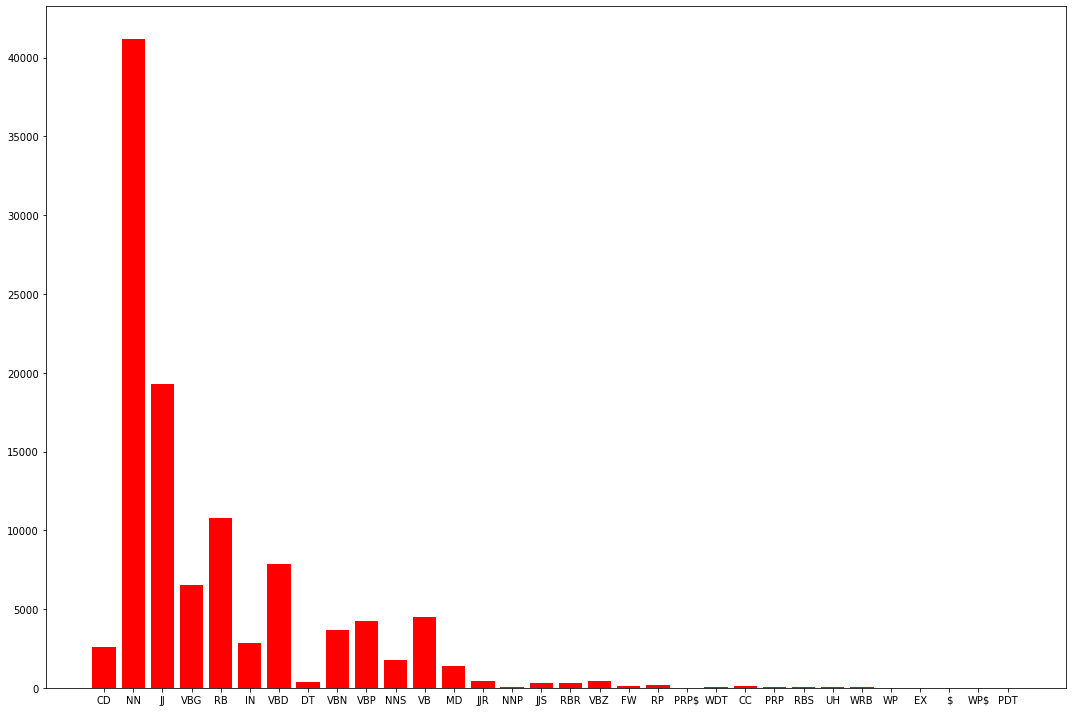

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

col = ['text']
df_old = pd.read_csv('ptsd_forum.csv', names=col, header=None)
df = pd.DataFrame({'text': df_old['text'],
                   'label': 1})
df.fillna(value='')

###tokenize title and body texts###
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))


###remove stopwords###

#returns all words that aren't in the list of stopwords
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words
#had to use 'python -m nltk.downloader stopwords' from the TestEnv to make stopwords work
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))


###lemmatizer -- lemmatizer maps common words back to its base###

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(x) for x in text]
    return lem_text
df['text'] = df['text'].apply(lambda x: word_lemmatizer(x))


###storing title and body columns as a list to feed into pos_tag###
title_list = list(df['text'])



#Text classification: pos tagging
pos_tagged_text = []

for ele in title_list:
    pos_tagged_text.append(nltk.pos_tag(ele))

    
df['pos_tagged_text'] = pos_tagged_text



###The codes below analyzes text frequency distribution, collocation, and concordance while excluding certain words###
single_w = []
exclude_list = ['www', 'psychologytoday', 'com', 'nan']

def exclude(text):
    words = [w for w in text if w not in exclude_list]
    return words
df['text'] = df['text'].apply(lambda x: exclude(x))

for item in df['pos_tagged_text']:
    for tuples in item:
        if tuples[0] not in exclude_list:
            single_w.append(tuples[0])

            
fd = nltk.FreqDist(single_w)
print(fd.most_common(20))


text = nltk.Text(single_w)
concordance_list = text.concordance_list("want", lines=20)
for entry in concordance_list:
    print(entry.line)
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
print(finder)
print(finder.ngram_fd.most_common(20))


'''creating a dictionary to store counts of unique POS tags''' 
pos_list = []
for row in df['pos_tagged_text']:
    for tup in row:
        if tup[1] not in pos_list:
            pos_list.append(tup[1])
            
pos_dict = {}
for item in pos_list:
    pos_dict[item] = 0
    for row in df['pos_tagged_text']:
        for tup in row:
            if tup[1] == item:
                pos_dict[item] += 1
                

'''Plotting the counts'''
%matplotlib inline

fig = plt.figure(figsize=(15,10))
plt.bar(pos_dict.keys(), pos_dict.values(), color='red')
plt.tight_layout()
plt.savefig("pos_dist.png", dpi=300)
plt.show()


df_new = pd.DataFrame({'text': df['text'],
                       'label': 1})


df_new.to_csv('ptsd_forum_clean.csv', index=False)


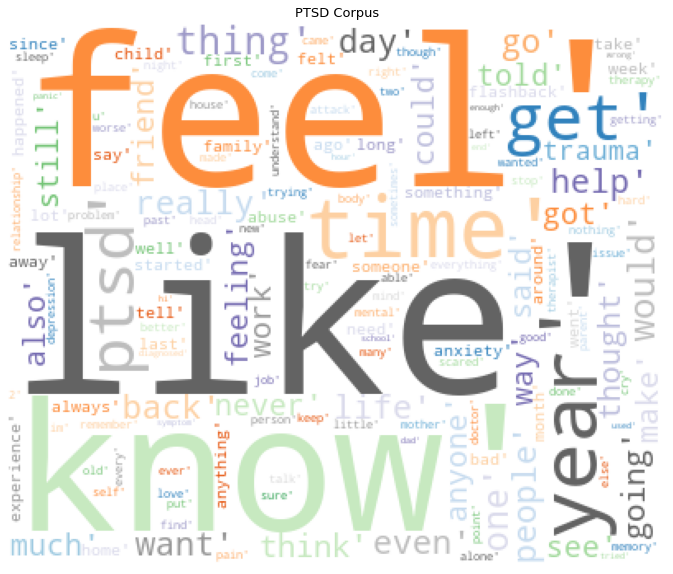

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
'''defining method to generate a WordCloud'''
def generate_wordcloud(data, title):
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      stopwords=exclude_list,
                      collocations=False,
                      background_color='white'
                     ).generate_from_text(data)
    plt.figure(figsize=(14,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.savefig("wordcloud.png", dpi=300)
    plt.show()
    
generate_wordcloud(str(single_w), 'PTSD Corpus')

In [11]:
df_new.head()

,text,label
NaN,[0],1
0.0,"[dave, carbonell, ph, psychologist, author, pa...",1
1.0,"[hi, guy, diagnosted, trauma, bullying, ptsd, ...",1
2.0,"[sooo, november, 2019, around, thanksgiving, s...",1
3.0,"[absence, record, work, fine, 1, day, last, ye...",1


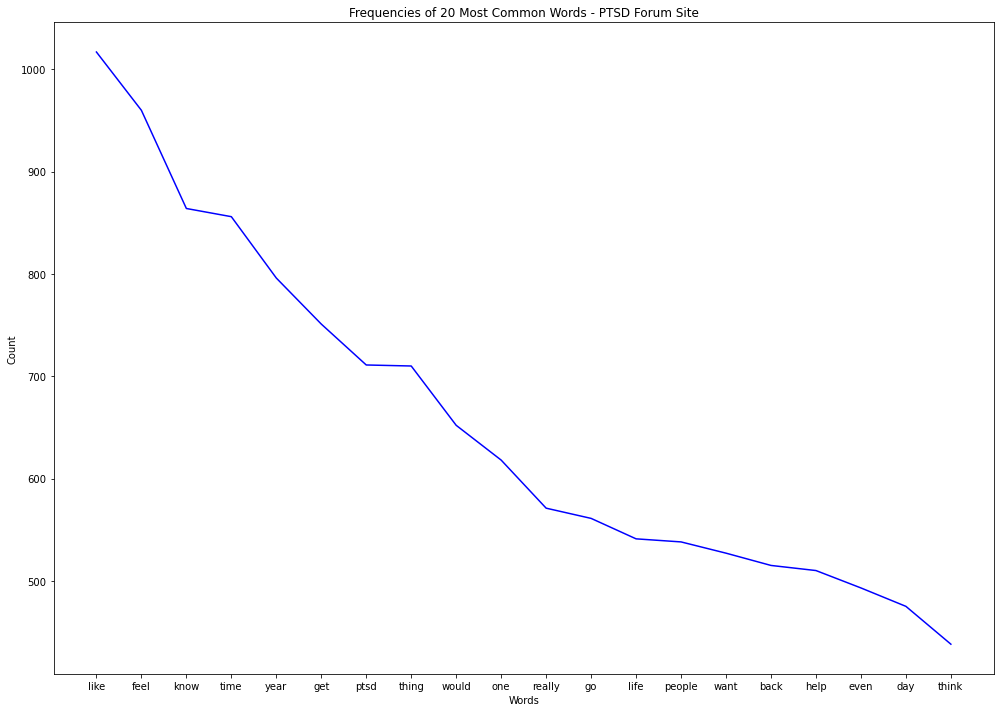

<Figure size 432x288 with 0 Axes>

In [14]:
top_20 = []
w_freq = fd.most_common(20)

freq_dist = dict(w_freq)
fig = plt.figure(figsize=(14,10))
plt.plot(freq_dist.keys(), freq_dist.values(), color='b')
plt.title("Frequencies of 20 Most Common Words - PTSD Forum Site")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.savefig("forum.png", dpi=300)